# Prediction of Coral Recovery Code/Level

In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns 


READING CSV AND CREATING DATAFRAME

In [2]:
data = pd.read_excel("CoralBleaching.xlsx")

# Data Preprocessing

In [3]:
data.shape

(6190, 28)

In [4]:
data.describe()
data.dtypes

ID                       int64
REGION                  object
SUBREGION               object
COUNTRY                 object
LOCATION                object
LAT                    float64
LON                    float64
MONTH                  float64
YEAR                     int64
DEPTH                   object
SEVERITY_CODE            int64
BLEACHING_SEVERITY      object
CORAL_FAMILY            object
CORAL_SPECIES           object
PERCENTAGE_AFFECTED     object
BLEACHING_DURATION      object
MORTALITY_CODE         float64
MORTALITY               object
RECOVERY_CODE          float64
RECOVERY                object
SURVEY_TYPE             object
SURVEY_AREA             object
WATER_TEMPERATURE       object
OTHER_FACTORS           object
REMARKS                 object
SOURCE                  object
REFERENCE_CODE         float64
COUNTRY_CODE            object
dtype: object

In [5]:
data.isnull().sum()


ID                        0
REGION                   27
SUBREGION                27
COUNTRY                   0
LOCATION                123
LAT                       0
LON                       0
MONTH                  1309
YEAR                      0
DEPTH                  3149
SEVERITY_CODE             0
BLEACHING_SEVERITY        0
CORAL_FAMILY           5892
CORAL_SPECIES          5370
PERCENTAGE_AFFECTED    4577
BLEACHING_DURATION     5927
MORTALITY_CODE         5681
MORTALITY              5711
RECOVERY_CODE          6099
RECOVERY               6069
SURVEY_TYPE            3939
SURVEY_AREA            5213
WATER_TEMPERATURE      5124
OTHER_FACTORS          6102
REMARKS                3103
SOURCE                    0
REFERENCE_CODE         4721
COUNTRY_CODE              0
dtype: int64

In [6]:
columns = ['MORTALITY_CODE','BLEACHING_DURATION','MORTALITY','RECOVERY','SURVEY_TYPE','SURVEY_AREA','OTHER_FACTORS','DEPTH','LOCATION','SUBREGION','ID','REMARKS','SOURCE','REFERENCE_CODE','COUNTRY_CODE','BLEACHING_SEVERITY']
           #'CORAL_FAMILY','CORAL_SPECIES','PERCENTAGE_AFFECTED','BLEACHING_DURATION','MORTALITY_CODE','MORTALITY','RECOVERY_CODE','RECOVERY','SURVEY_TYPE','SURVEY_AREA','OTHER_FACTORS']

In [7]:
DATA=data.drop(columns,inplace=False,axis=1)


In [8]:
new_dataframe = DATA[DATA.SEVERITY_CODE != -1 ]
#new_dataframe = new_dataframe.reset_index(drop=True)
new_dataframe


,REGION,COUNTRY,LAT,LON,MONTH,YEAR,SEVERITY_CODE,CORAL_FAMILY,CORAL_SPECIES,PERCENTAGE_AFFECTED,RECOVERY_CODE,WATER_TEMPERATURE
0,NaN,France,-21.220000,55.220000,4.0,2008,0,NaN,NaN,NaN,NaN,NaN
1,NaN,France,-21.050000,55.230000,7.0,2008,0,NaN,NaN,NaN,NaN,NaN
2,NaN,France,-21.160000,55.280000,2.0,2008,0,NaN,NaN,NaN,NaN,NaN
4,NaN,Macau,10.120000,99.810000,7.0,2009,0,NaN,NaN,NaN,NaN,"Air temp 28 Deg C, Water temp 29 Deg C"
6,NaN,Mexico (Pacific),16.000000,-95.000000,5.0,1998,3,NaN,"Pocillopora,Pavona and Porites",NaN,NaN,NaN
7,NaN,Panama (Atlantic),9.272300,-82.006500,6.0,2002,2,"Acroporidae, Poritidae","Acropora palmata, Porites astreoides",23%,NaN,unusually warm
8,NaN,St. Croix,17.790000,-64.630000,NaN,1998,2,NaN,NaN,NaN,0.0,NaN
9,NaN,St. Croix,17.684000,-64.739000,9.0,1987,1,NaN,"Colpophyllia natans, Diploria labyrinthiformis...",30%,NaN,NaN
10,NaN,St. Croix,17.700000,-64.900000,7.0,2001,1,Siderastridae,"Siderastrea siderea, Palythoa",NaN,NaN,NaN
11,NaN,St. Helena,-10.267000,166.279000,8.0,2011,0,NaN,NaN,NaN,NaN,"Air temperature 30 deg C, water temperature 28..."


In [9]:
new_dataframe.isnull().sum()

REGION                   25
COUNTRY                   0
LAT                       0
LON                       0
MONTH                   617
YEAR                      0
SEVERITY_CODE             0
CORAL_FAMILY           4697
CORAL_SPECIES          4314
PERCENTAGE_AFFECTED    3386
RECOVERY_CODE          4899
WATER_TEMPERATURE      4254
dtype: int64

 Filling Missing Values

In [10]:
new_dataframe['RECOVERY_CODE'] = pd.DataFrame(new_dataframe['RECOVERY_CODE']).fillna(method = 'bfill')
new_dataframe['RECOVERY_CODE'] = pd.DataFrame(new_dataframe['RECOVERY_CODE']).fillna(method = 'ffill')

new_dataframe['CORAL_FAMILY'] = pd.DataFrame(new_dataframe['CORAL_FAMILY']).fillna(method = 'bfill')
new_dataframe['CORAL_FAMILY'] = pd.DataFrame(new_dataframe['CORAL_FAMILY']).fillna(method = 'ffill')

new_dataframe['CORAL_SPECIES'] = pd.DataFrame(new_dataframe['CORAL_SPECIES']).fillna(method = 'bfill')
new_dataframe['CORAL_SPECIES'] = pd.DataFrame(new_dataframe['CORAL_SPECIES']).fillna(method = 'ffill')

new_dataframe['REGION'] = pd.DataFrame(new_dataframe['REGION']).fillna(method = 'bfill')
new_dataframe['REGION'] = pd.DataFrame(new_dataframe['REGION']).fillna(method = 'ffill')


new_dataframe['MONTH'] = pd.DataFrame(new_dataframe['MONTH']).fillna(method = 'pad')

new_dataframe['WATER_TEMPERATURE'] = pd.DataFrame(new_dataframe['WATER_TEMPERATURE']).fillna(method = 'bfill')
new_dataframe['WATER_TEMPERATURE'] = pd.DataFrame(new_dataframe['WATER_TEMPERATURE']).fillna(method = 'ffill')

new_dataframe['PERCENTAGE_AFFECTED'] = pd.DataFrame(new_dataframe['PERCENTAGE_AFFECTED']).fillna(method = 'bfill')
new_dataframe['PERCENTAGE_AFFECTED'] = pd.DataFrame(new_dataframe['PERCENTAGE_AFFECTED']).fillna(method = 'ffill')

#new_dataframe['REGION'] = new_dataframe.fillna(new_dataframe['REGION'].mode().iloc[0])
#new_dataframe['CORAL_SPECIES'] = new_dataframe.fillna(new_dataframe['CORAL_SPECIES'].mode().iloc[0])
#new_dataframe['CORAL_FAMILY'] =new_dataframe.fillna(new_dataframe['CORAL_FAMILY'].mode())
new_dataframe

C:\Users\Akshada\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\Akshada\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Akshada\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://p

,REGION,COUNTRY,LAT,LON,MONTH,YEAR,SEVERITY_CODE,CORAL_FAMILY,CORAL_SPECIES,PERCENTAGE_AFFECTED,RECOVERY_CODE,WATER_TEMPERATURE
0,Africa,France,-21.220000,55.220000,4.0,2008,0,"Acroporidae, Poritidae","Pocillopora,Pavona and Porites",23%,0.0,"Air temp 28 Deg C, Water temp 29 Deg C"
1,Africa,France,-21.050000,55.230000,7.0,2008,0,"Acroporidae, Poritidae","Pocillopora,Pavona and Porites",23%,0.0,"Air temp 28 Deg C, Water temp 29 Deg C"
2,Africa,France,-21.160000,55.280000,2.0,2008,0,"Acroporidae, Poritidae","Pocillopora,Pavona and Porites",23%,0.0,"Air temp 28 Deg C, Water temp 29 Deg C"
4,Africa,Macau,10.120000,99.810000,7.0,2009,0,"Acroporidae, Poritidae","Pocillopora,Pavona and Porites",23%,0.0,"Air temp 28 Deg C, Water temp 29 Deg C"
6,Africa,Mexico (Pacific),16.000000,-95.000000,5.0,1998,3,"Acroporidae, Poritidae","Pocillopora,Pavona and Porites",23%,0.0,unusually warm
7,Africa,Panama (Atlantic),9.272300,-82.006500,6.0,2002,2,"Acroporidae, Poritidae","Acropora palmata, Porites astreoides",23%,0.0,unusually warm
8,Africa,St. Croix,17.790000,-64.630000,6.0,1998,2,Siderastridae,"Colpophyllia natans, Diploria labyrinthiformis...",30%,0.0,"Air temperature 30 deg C, water temperature 28..."
9,Africa,St. Croix,17.684000,-64.739000,9.0,1987,1,Siderastridae,"Colpophyllia natans, Diploria labyrinthiformis...",30%,2.0,"Air temperature 30 deg C, water temperature 28..."
10,Africa,St. Croix,17.700000,-64.900000,7.0,2001,1,Siderastridae,"Siderastrea siderea, Palythoa",50-90,2.0,"Air temperature 30 deg C, water temperature 28..."
11,Africa,St. Helena,-10.267000,166.279000,8.0,2011,0,Faviidae,Montastrea,50-90,2.0,"Air temperature 30 deg C, water temperature 28..."


In [11]:
new_dataframe.isnull().sum()

REGION                 0
COUNTRY                0
LAT                    0
LON                    0
MONTH                  0
YEAR                   0
SEVERITY_CODE          0
CORAL_FAMILY           0
CORAL_SPECIES          0
PERCENTAGE_AFFECTED    0
RECOVERY_CODE          0
WATER_TEMPERATURE      0
dtype: int64

In [12]:
df=new_dataframe.sort_values(by="YEAR") # sort dataframe by year

In [13]:
df=df.drop_duplicates(subset=None, keep='first', inplace=False)

In [14]:
df.columns
df.to_csv("newbleaching.csv")

In [15]:
df.dtypes

REGION                  object
COUNTRY                 object
LAT                    float64
LON                    float64
MONTH                  float64
YEAR                     int64
SEVERITY_CODE            int64
CORAL_FAMILY            object
CORAL_SPECIES           object
PERCENTAGE_AFFECTED     object
RECOVERY_CODE          float64
WATER_TEMPERATURE       object
dtype: object

REPLACING UNWANTED CHARACHTERS USING REGULAR EXPRESSION

In [16]:
df['PERCENTAGE_AFFECTED']=df['PERCENTAGE_AFFECTED'].replace('%','',regex=True)
df['PERCENTAGE_AFFECTED']=df['PERCENTAGE_AFFECTED'].replace('>','',regex=True)
df['PERCENTAGE_AFFECTED']=df['PERCENTAGE_AFFECTED'].replace('\t','',regex=True)
df['PERCENTAGE_AFFECTED']=df['PERCENTAGE_AFFECTED'].replace('<','',regex=True)
df['PERCENTAGE_AFFECTED']=df['PERCENTAGE_AFFECTED'].replace('[a-zA-Z+(?)±]','',regex=True)
df['PERCENTAGE_AFFECTED']=df['PERCENTAGE_AFFECTED'].replace(' ','',regex=True)

df['PERCENTAGE_AFFECTED'] = df['PERCENTAGE_AFFECTED'].str.split('-',expand=True)


df["PERCENTAGE_AFFECTED"] = pd.to_numeric(df["PERCENTAGE_AFFECTED"], downcast="float")


In [17]:
df.columns
df.dtypes

REGION                  object
COUNTRY                 object
LAT                    float64
LON                    float64
MONTH                  float64
YEAR                     int64
SEVERITY_CODE            int64
CORAL_FAMILY            object
CORAL_SPECIES           object
PERCENTAGE_AFFECTED    float32
RECOVERY_CODE          float64
WATER_TEMPERATURE       object
dtype: object

SPLITTING CORAL FAMILY BASED ON COMMA AND STACKING ROWS

In [18]:
import numpy as np
from itertools import chain

# return list from series of comma-separated strings
def chainer(s):
    return list(chain.from_iterable(s.str.split(',')))

# calculate lengths of splits
lens = df['CORAL_FAMILY'].str.split(',').map(len)

#create new dataframe, repeating or chaining as appropriate
res = pd.DataFrame({'REGION': np.repeat(df['REGION'], lens),
                    'COUNTRY': np.repeat(df['COUNTRY'], lens),
                    'LAT': np.repeat(df['LAT'], lens),
                    'LON': np.repeat(df['LON'], lens),
                    'MONTH': np.repeat(df['MONTH'], lens),
                    'YEAR': np.repeat(df['YEAR'], lens),
                    'SEVERITY_CODE': np.repeat(df['SEVERITY_CODE'], lens),
                    'RECOVERY_CODE': np.repeat(df['RECOVERY_CODE'], lens),
                    'WATER_TEMPERATURE': np.repeat(df['WATER_TEMPERATURE'], lens),
                    'PERCENTAGE_AFFECTED': np.repeat(df['PERCENTAGE_AFFECTED'], lens),
                    'CORAL_SPECIES': np.repeat(df['CORAL_SPECIES'],lens),
                    'CORAL_FAMILY': chainer(df['CORAL_FAMILY'])})

#res.reset_index()                                                                                                                                      


In [19]:
res['CORAL_FAMILY']=res['CORAL_FAMILY'].str.strip()

In [20]:
res.CORAL_FAMILY.unique()

array(['Acroporidae', 'Pocillipordae', 'Milleporidae', 'Poritidae',
       'Faviidae', 'Siderastridae', 'Pocilloporidae', 'Siderastriedae',
       'Mussidae', 'Oculinidae', 'Agariciidae', 'Pocillopordae',
       'Acropiridae', 'Fungiidae', 'Siderastreidae', 'Pocillopora sp',
       'Montipora (submasive and encrusting)', 'Fungiid (Fungia',
       'Ctenactis and Sandhalolita', 'Acropora (maybe grandis)',
       'Pectinia', 'Diploastrea heliopora', 'Echinopora', 'Galaxea',
       'Agaricidae', 'Meandrinidae', '', 'Zoanthidae', 'Agariicidae',
       'Pocilliporodae', 'Ephyllidae', 'Pritidae', 'Dendrophylliidae',
       'Faviidae and Acroporidae', 'Fungidae', 'Merulinidae',
       'and\nDendrophyllidae', 'Pocillopora', 'Fungia', 'Halomitra',
       'Acropora hyacinthus', 'Acropora nasuta', 'Goniastrea',
       'Platygyra', 'Leptastrea', 'Porites', 'Alcyoniidae',
       'Milliporidae', 'Pocciloporidae', 'Siderasteridae', 'Euphyllidae'],
      dtype=object)

ENCODING CATEGORIAL VALUES

In [21]:
from sklearn.preprocessing import LabelEncoder
# instantiate labelencoder object
le = LabelEncoder()

# apply le on categorical feature columns
res['CORAL_FAMILY']=le.fit_transform(res['CORAL_FAMILY'])
#X[categorical_cols].head(10)



res.CORAL_FAMILY.unique()

array([ 5, 36, 28, 43, 16, 47, 41, 48, 31, 32,  7, 40,  1, 21, 46, 39, 30,
       20, 10,  2, 33, 12, 13, 22,  6, 26,  0, 49,  8, 37, 14, 44, 11, 17,
       19, 27, 50, 38, 18, 24,  3,  4, 23, 34, 25, 42,  9, 29, 35, 45, 15],
      dtype=int64)

# Exploratory Data Analysis

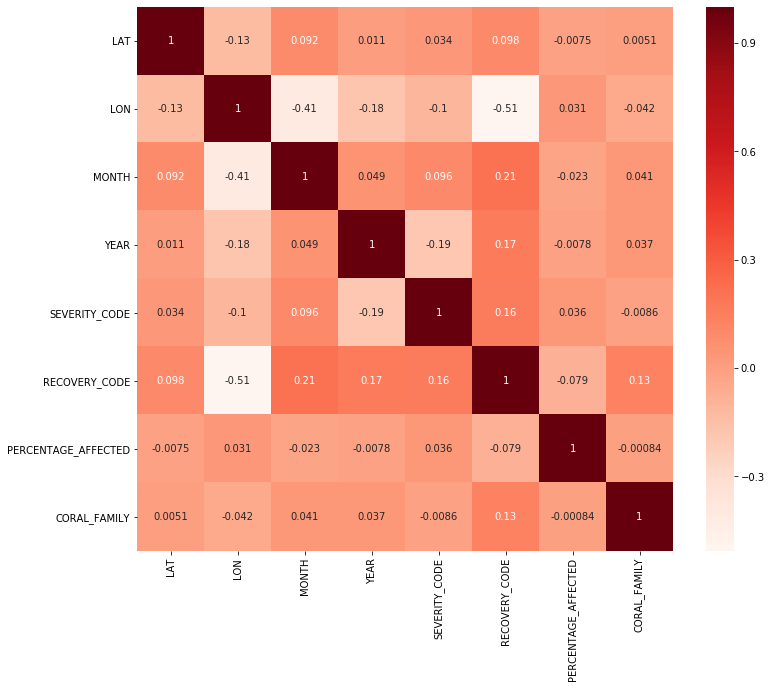

In [22]:
plt.figure(figsize=(12,10))
cor = res.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [23]:
res.corr(method ='pearson')

,LAT,LON,MONTH,YEAR,SEVERITY_CODE,RECOVERY_CODE,PERCENTAGE_AFFECTED,CORAL_FAMILY
LAT,1.000000,-0.131545,0.092137,0.010646,0.034482,0.098155,-0.007452,0.005132
LON,-0.131545,1.000000,-0.406004,-0.181424,-0.103418,-0.505657,0.030861,-0.042351
MONTH,0.092137,-0.406004,1.000000,0.049081,0.096187,0.208615,-0.022803,0.041063
YEAR,0.010646,-0.181424,0.049081,1.000000,-0.189339,0.165941,-0.007843,0.037021
SEVERITY_CODE,0.034482,-0.103418,0.096187,-0.189339,1.000000,0.160800,0.036331,-0.008577
RECOVERY_CODE,0.098155,-0.505657,0.208615,0.165941,0.160800,1.000000,-0.078882,0.134798
PERCENTAGE_AFFECTED,-0.007452,0.030861,-0.022803,-0.007843,0.036331,-0.078882,1.000000,-0.000838
CORAL_FAMILY,0.005132,-0.042351,0.041063,0.037021,-0.008577,0.134798,-0.000838,1.000000


OUTLIER DETECTION

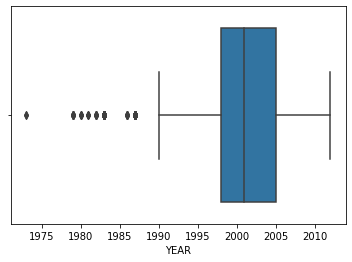

In [24]:
sns.boxplot(res.YEAR)

In [25]:
res['YEAR'].between(1970, 1990, inclusive=False)

indexn=res[res['YEAR'].between(1970, 1990, inclusive=True)].index
res.drop(indexn,inplace=True,axis=0)







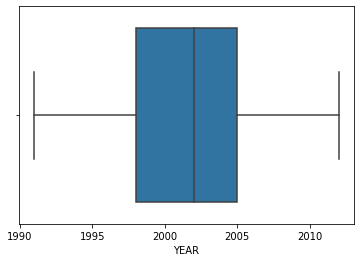

In [26]:
sns.boxplot(res.YEAR)

In [27]:
res.YEAR.unique()

array([1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001,
       2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012],
      dtype=int64)

YEAR-WISE ANALYSIS

In [28]:
Y19915=res.loc[(res.YEAR==1991) | (res.YEAR==1992) | (res.YEAR==1993) | (res.YEAR==1994) | (res.YEAR==1995) ]


Text(0.5, 1.0, 'REGION-WISE SEVERITY IN 5 YEARS (1991-1995)')

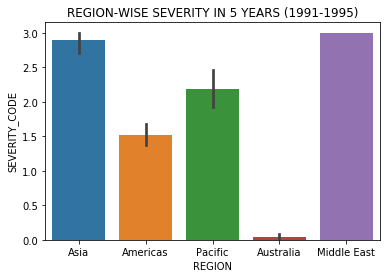

In [29]:
sns.barplot(Y19915.REGION,Y19915.SEVERITY_CODE)
plt.title("REGION-WISE SEVERITY IN 5 YEARS (1991-1995)")


Text(0.5, 1.0, 'CORAL FAMILIES SEVERITY LEVELS 5 YEAR (1991-1995)')

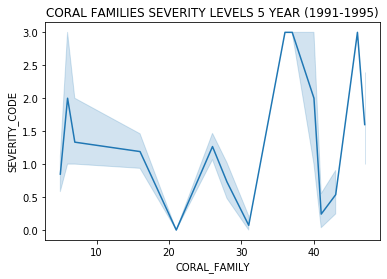

In [30]:
sns.lineplot(x=Y19915.CORAL_FAMILY,y=Y19915.SEVERITY_CODE)
plt.title("CORAL FAMILIES SEVERITY LEVELS 5 YEAR (1991-1995)")

Text(0.5, 1.0, 'REGION-WISE SEVERITY IN 5 YEARS (1991-1995)')

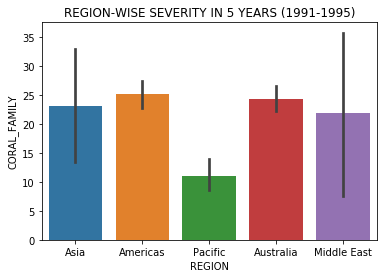

In [31]:
sns.barplot(Y19915.REGION,Y19915.CORAL_FAMILY)
plt.title("REGION-WISE SEVERITY IN 5 YEARS (1991-1995)")


Text(0.5, 1.0, 'PERCENTAGE CORALaS BLEACHING IN REGIONS 5 YEARS(1991-1995)')

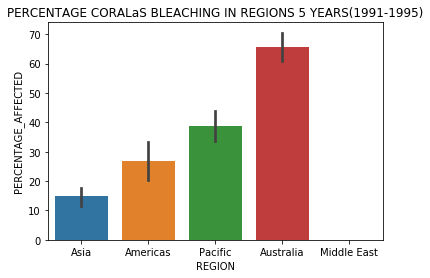

In [32]:
sns.barplot(Y19915.REGION,Y19915.PERCENTAGE_AFFECTED)
plt.title("PERCENTAGE CORALaS BLEACHING IN REGIONS 5 YEARS(1991-1995)")

Text(0.5, 1.0, 'PERCENTAGE CORALaS BLEACHIN 5 YEARS(1991-1995)')

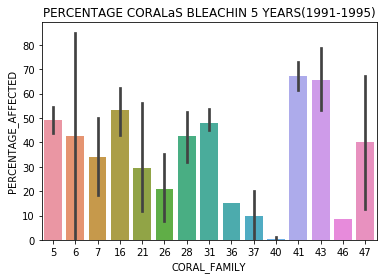

In [33]:
sns.barplot(Y19915.CORAL_FAMILY,Y19915.PERCENTAGE_AFFECTED)
plt.title("PERCENTAGE CORALaS BLEACHIN 5 YEARS(1991-1995)")

In [34]:
Y19960=res.loc[(res.YEAR==1996) | (res.YEAR==1997) | (res.YEAR==1998) | (res.YEAR==1999) | (res.YEAR==2000) ]


Text(0.5, 1.0, 'REGION-WISE SEVERITY IN 5 YEARS (1996-2000)')

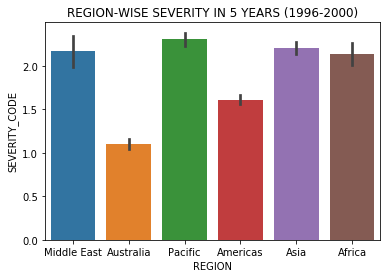

In [35]:
sns.barplot(Y19960.REGION,Y19960.SEVERITY_CODE)
plt.title("REGION-WISE SEVERITY IN 5 YEARS (1996-2000)")


Text(0.5, 1.0, 'CORAL FAMILIES SEVERITY LEVELS 5 YEAR (1996-2000)')

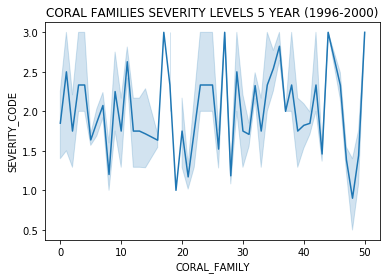

In [36]:
sns.lineplot(x=Y19960.CORAL_FAMILY,y=Y19960.SEVERITY_CODE)
plt.title("CORAL FAMILIES SEVERITY LEVELS 5 YEAR (1996-2000)")

Text(0.5, 1.0, 'CORAL FAMILY IN REGION OVER 5 YEARS (1996-2000)')

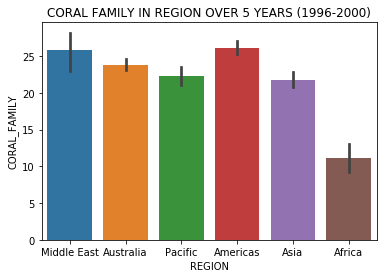

In [37]:
sns.barplot(Y19960.REGION,Y19960.CORAL_FAMILY)
plt.title("CORAL FAMILY IN REGION OVER 5 YEARS (1996-2000)")

Text(0.5, 1.0, 'PERCENTAGE CORALaS BLEACHING IN REGIONS 5 YEARS(1996-2000)')

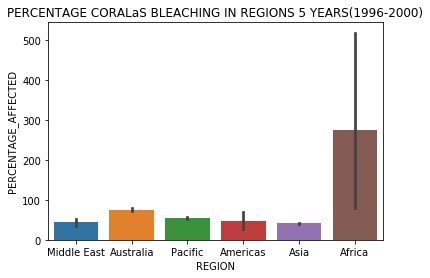

In [38]:
sns.barplot(Y19960.REGION,Y19960.PERCENTAGE_AFFECTED)
plt.title("PERCENTAGE CORALaS BLEACHING IN REGIONS 5 YEARS(1996-2000)")

Text(0.5, 1.0, 'PERCENTAGE CORALaS BLEACHIN 5 YEARS(1996-2000)')

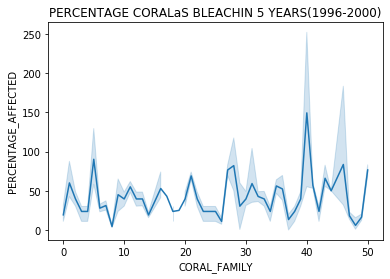

In [39]:
sns.lineplot(Y19960.CORAL_FAMILY,Y19960.PERCENTAGE_AFFECTED)
plt.title("PERCENTAGE CORALaS BLEACHIN 5 YEARS(1996-2000)")

In [40]:
Y20015=res.loc[(res.YEAR==2001) | (res.YEAR==2002) | (res.YEAR==2003) | (res.YEAR==2004) | (res.YEAR==2005) ]


Text(0.5, 1.0, 'REGION-WISE SEVERITY IN 5 YEARS (2001-2005)')

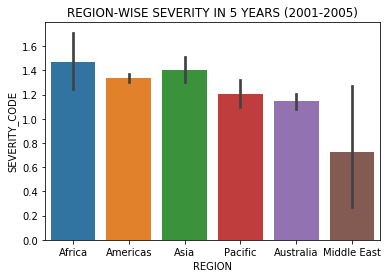

In [41]:
sns.barplot(Y20015.REGION,Y20015.SEVERITY_CODE)
plt.title("REGION-WISE SEVERITY IN 5 YEARS (2001-2005)")


Text(0.5, 1.0, 'CORAL FAMILIES SEVERITY LEVELS 5 YEAR (2001-2005)')

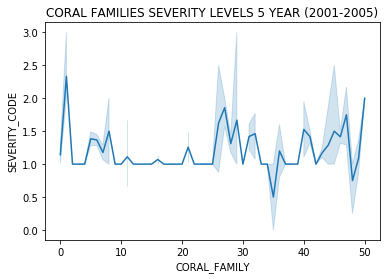

In [42]:
sns.lineplot(x=Y20015.CORAL_FAMILY,y=Y20015.SEVERITY_CODE)
plt.title("CORAL FAMILIES SEVERITY LEVELS 5 YEAR (2001-2005)")

Text(0.5, 1.0, 'CORAL FAMILY IN REGION OVER 5 YEARS (2001-2005)')

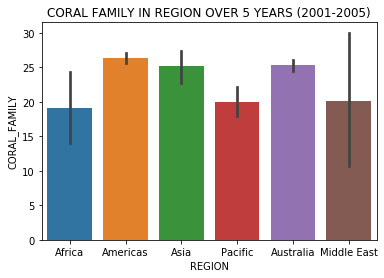

In [43]:
sns.barplot(Y20015.REGION,Y20015.CORAL_FAMILY)
plt.title("CORAL FAMILY IN REGION OVER 5 YEARS (2001-2005)")

Text(0.5, 1.0, 'PERCENTAGE CORALS BLEACHING IN REGIONS 5 YEARS(2001-2005)')

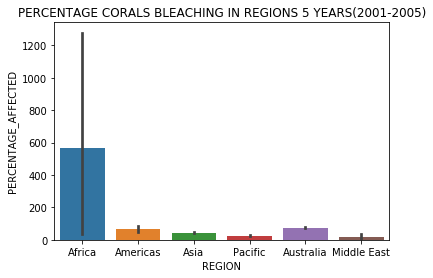

In [44]:
sns.barplot(Y20015.REGION,Y20015.PERCENTAGE_AFFECTED)
plt.title("PERCENTAGE CORALS BLEACHING IN REGIONS 5 YEARS(2001-2005)")

Text(0.5, 1.0, 'PERCENTAGE OF CORAL AFFECTED OVER 5 YEARS (2001-2005)')

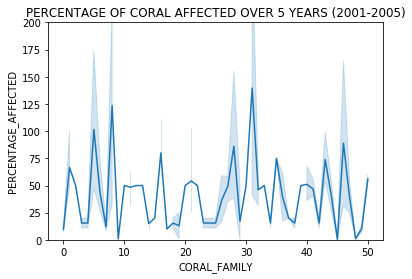

In [45]:
sns.lineplot(Y20015.CORAL_FAMILY,Y20015.PERCENTAGE_AFFECTED)
plt.ylim(0,200)
plt.title("PERCENTAGE OF CORAL AFFECTED OVER 5 YEARS (2001-2005)")

In [46]:
Y200512=res.loc[(res.YEAR==2006) | (res.YEAR==2007) | (res.YEAR==2008) | (res.YEAR==2009) | (res.YEAR==2010)  ]


Text(0.5, 1.0, 'REGION-WISE SEVERITY IN 5 YEARS (2006-2010)')

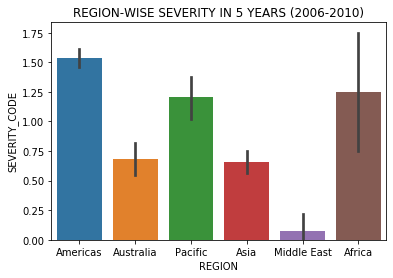

In [47]:
sns.barplot(Y200512.REGION,Y200512.SEVERITY_CODE)
plt.title("REGION-WISE SEVERITY IN 5 YEARS (2006-2010)")


Text(0.5, 1.0, 'CORAL FAMILIES SEVERITY LEVELS 5 YEAR (2006-2010)')

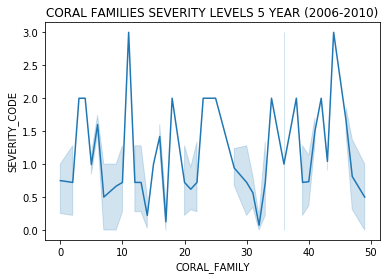

In [48]:
sns.lineplot(x=Y200512.CORAL_FAMILY,y=Y200512.SEVERITY_CODE)
plt.title("CORAL FAMILIES SEVERITY LEVELS 5 YEAR (2006-2010)")

Text(0.5, 1.0, 'CORAL FAMILY IN REGION OVER 5 YEARS (2006-2010)')

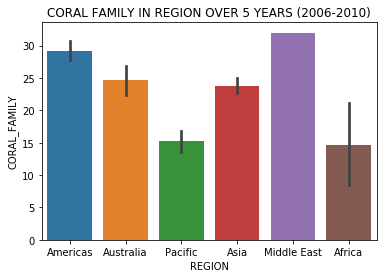

In [49]:
sns.barplot(Y200512.REGION,Y200512.CORAL_FAMILY)
plt.title("CORAL FAMILY IN REGION OVER 5 YEARS (2006-2010)")

Text(0.5, 1.0, 'PERCENTAGE CORALS BLEACHING IN REGIONS 5 YEARS(2006-2010)')

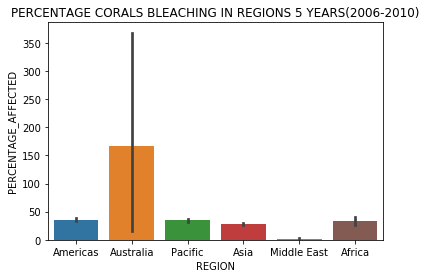

In [50]:
sns.barplot(Y200512.REGION,Y200512.PERCENTAGE_AFFECTED)
plt.title("PERCENTAGE CORALS BLEACHING IN REGIONS 5 YEARS(2006-2010)")

Text(0.5, 1.0, 'PERCENTAGE OF CORAL AFFECTED OVER 5 YEARS (2006-2010)')

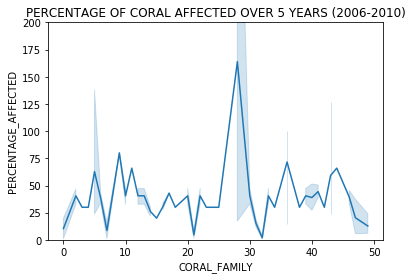

In [51]:
sns.lineplot(Y200512.CORAL_FAMILY,Y200512.PERCENTAGE_AFFECTED)
plt.ylim(0,200)
plt.title("PERCENTAGE OF CORAL AFFECTED OVER 5 YEARS (2006-2010)")

In [52]:
res.isnull().sum()
res['PERCENTAGE_AFFECTED']=pd.DataFrame(res['PERCENTAGE_AFFECTED']).fillna(method = 'ffill')
res.isnull().sum()


REGION                 0
COUNTRY                0
LAT                    0
LON                    0
MONTH                  0
YEAR                   0
SEVERITY_CODE          0
RECOVERY_CODE          0
WATER_TEMPERATURE      0
PERCENTAGE_AFFECTED    0
CORAL_SPECIES          0
CORAL_FAMILY           0
dtype: int64

C:\Users\Akshada\Anaconda3\lib\site-packages\seaborn\axisgrid.py:715: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


Text(2886.220454545456, 0.5, 'REGION')

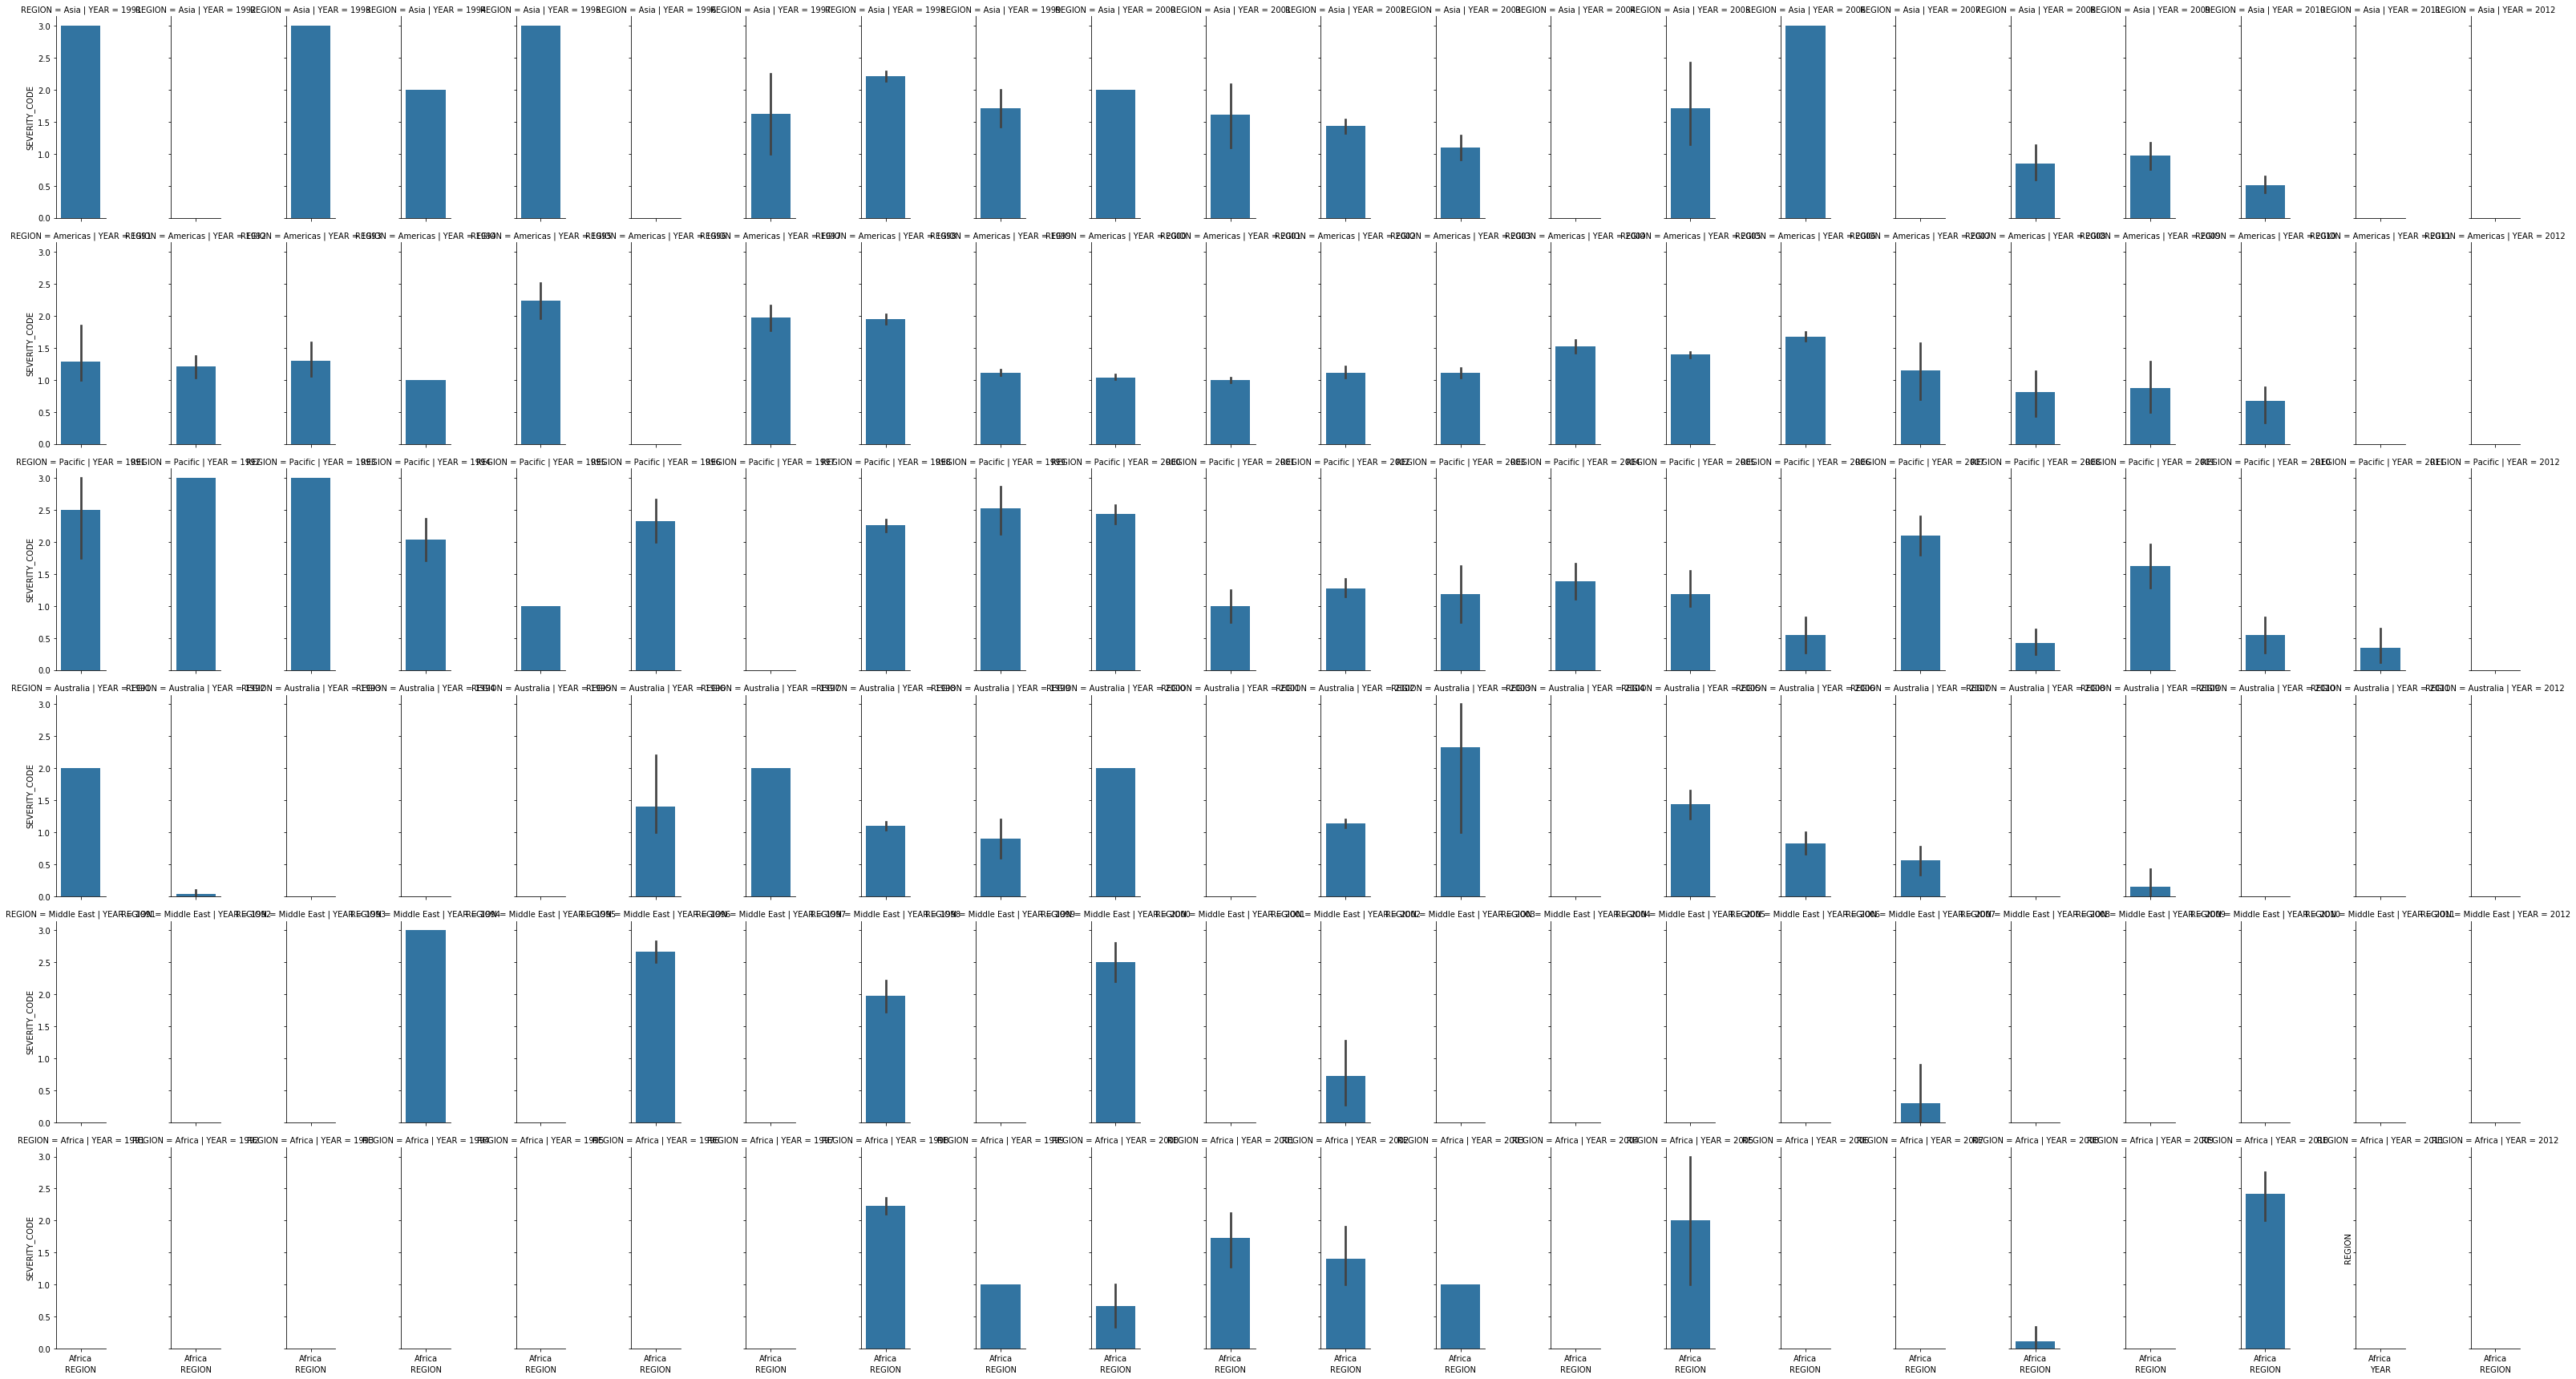

In [53]:
g = sns.FacetGrid(res, row="REGION",col="YEAR", height=4, aspect=.5)
g.map(sns.barplot, "REGION", "SEVERITY_CODE");
plt.xlabel("YEAR")
plt.ylabel("REGION")

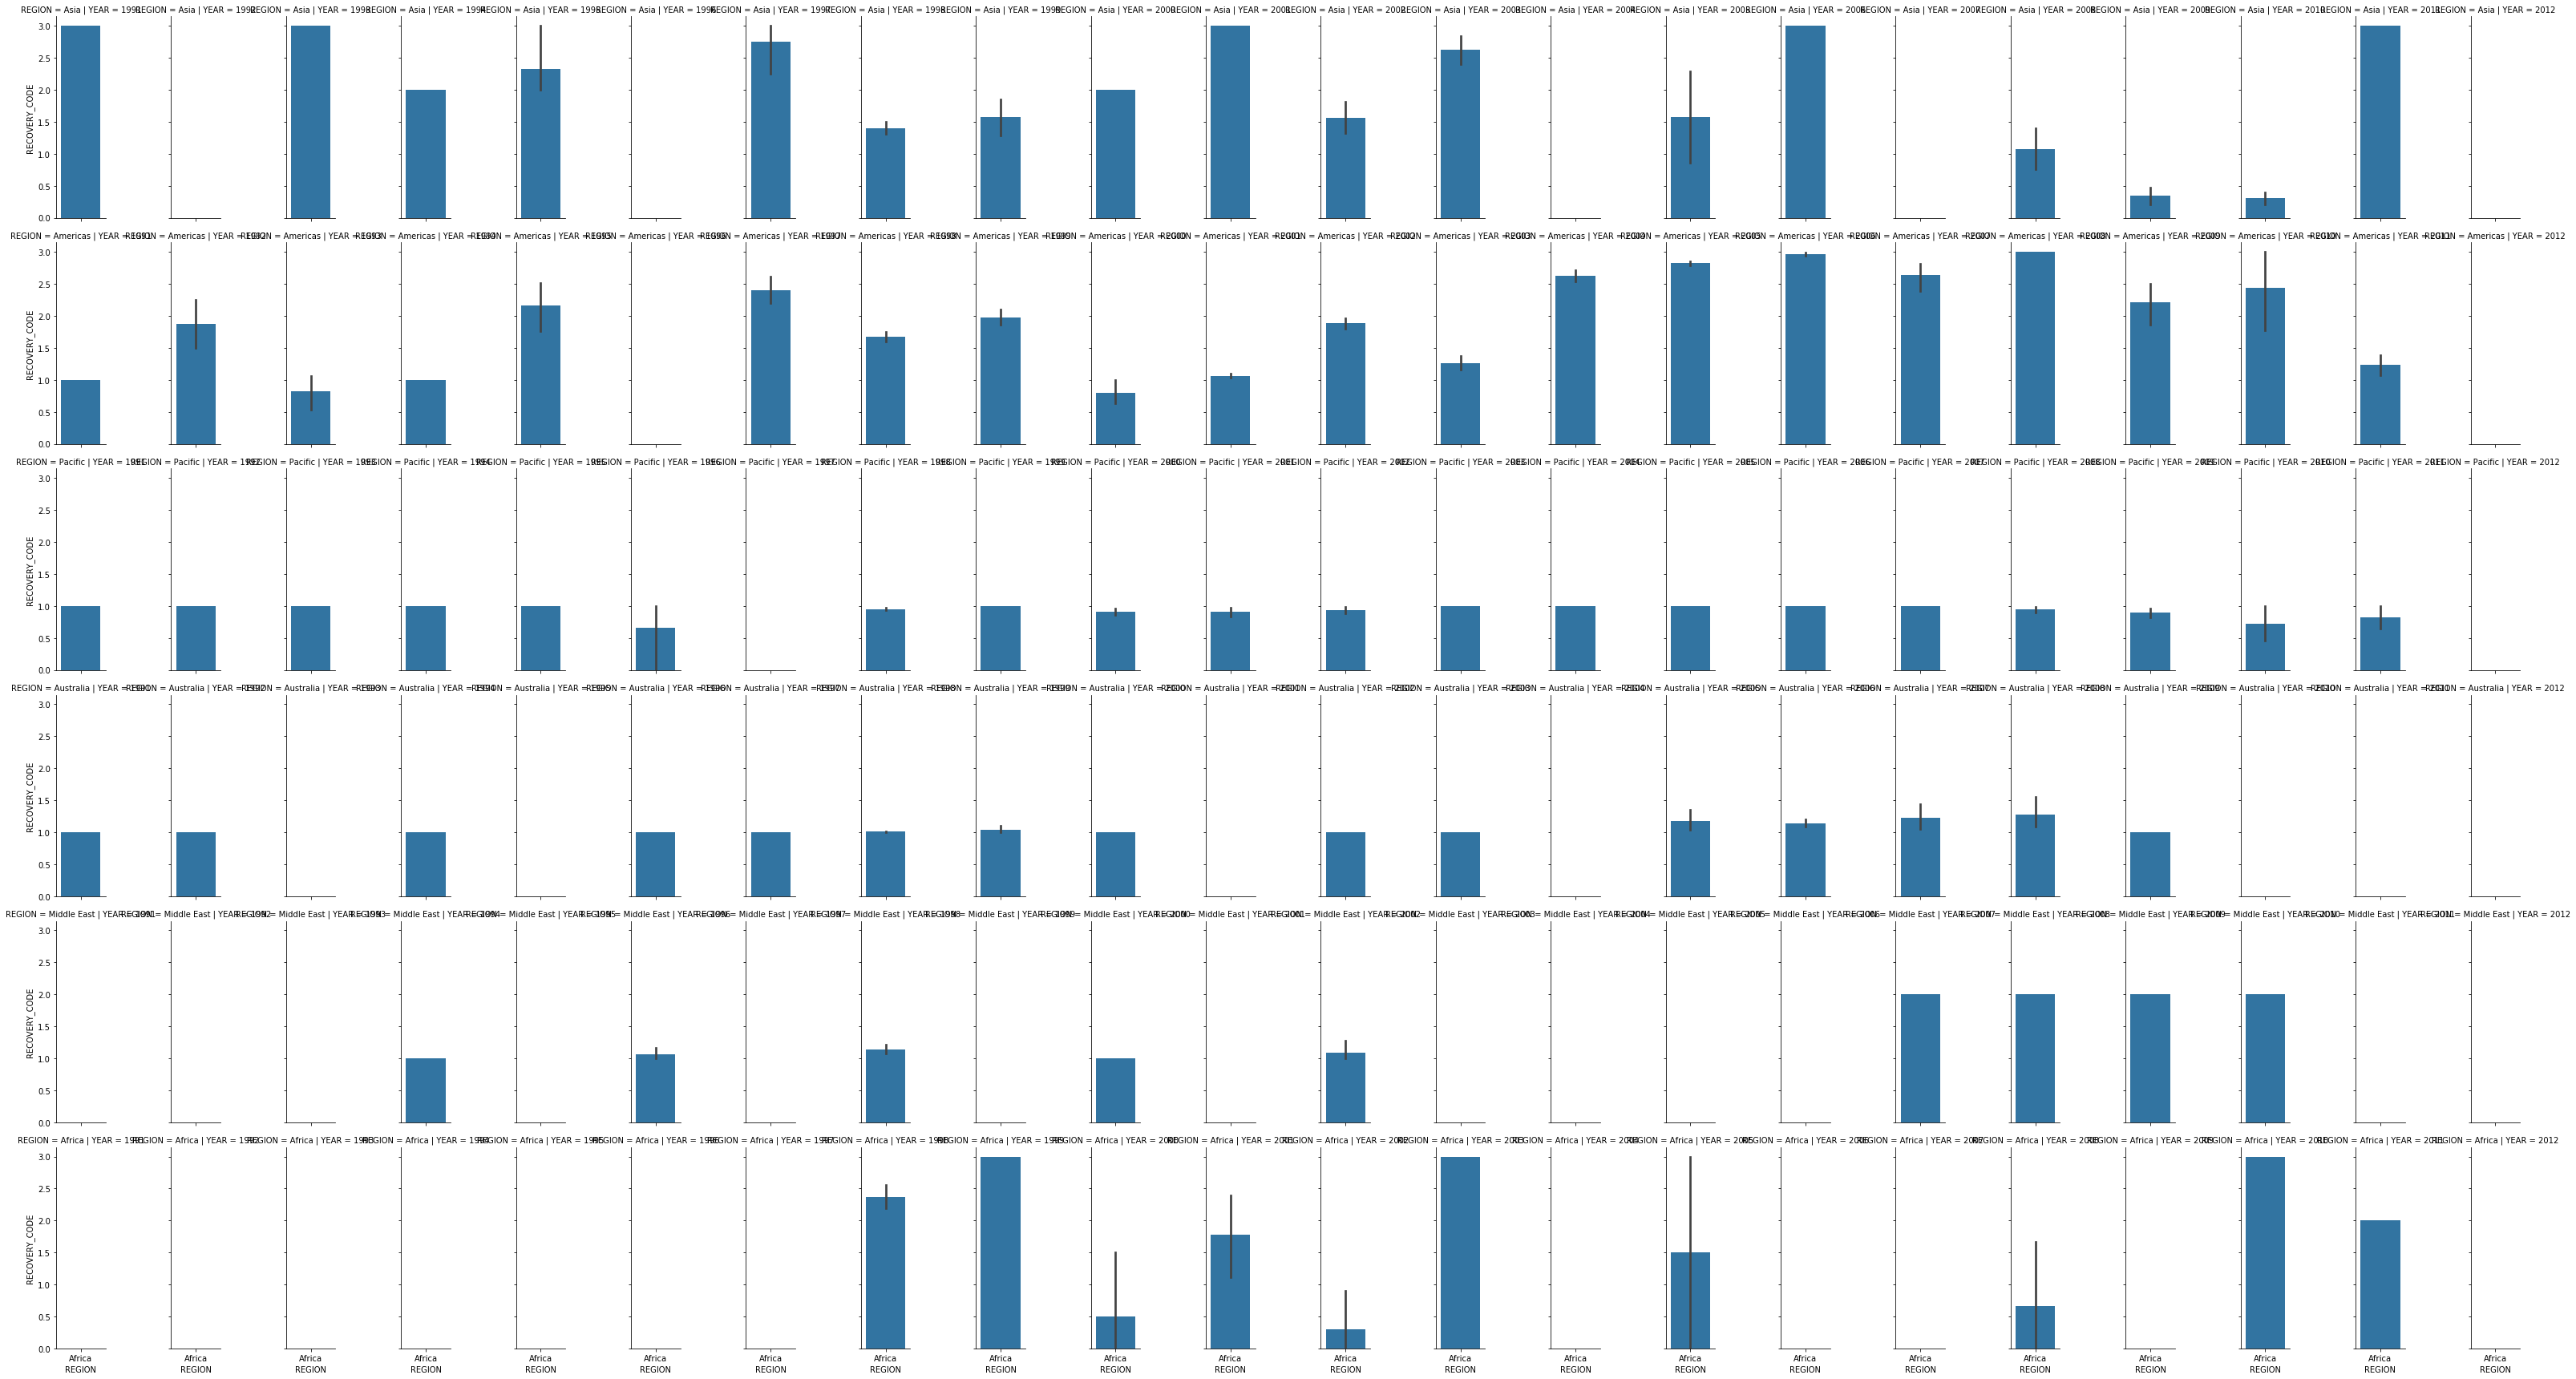

In [54]:
g = sns.FacetGrid(res, row="REGION",col="YEAR", height=4, aspect=.5)
g.map(sns.barplot, "REGION", "RECOVERY_CODE");

# Model development

DECISION TREE CLASSIFIER

In [55]:
from sklearn import datasets 
from sklearn.metrics import confusion_matrix,accuracy_score 
from sklearn.model_selection import train_test_split
from sklearn import tree
X=res[['LAT','LON','CORAL_FAMILY','PERCENTAGE_AFFECTED','SEVERITY_CODE']]
y=res['RECOVERY_CODE']
  
# dividing X, y into train and test data 
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0) 
  
# training a DescisionTreeClassifier 
from sklearn.tree import DecisionTreeClassifier 
dtree_model = DecisionTreeClassifier() 
dtree_model.fit(X_train, y_train) 


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [56]:
y_pred = dtree_model.predict(X_test)

In [57]:
accuracy_score(y_test,y_pred)*100

98.22345045400711

K NEIGHBORS CLASSIFIER

In [58]:

# training a KNN classifier 
from sklearn.neighbors import KNeighborsClassifier 
knn = KNeighborsClassifier(n_neighbors = 7).fit(X_train, y_train) 
  
# accuracy on X_test 
accuracy = knn.score(X_test, y_test) 
accuracy*100


93.5254638768259

Naive Bayes Classifier

In [59]:
from sklearn.naive_bayes import GaussianNB 
gnb = GaussianNB().fit(X_train, y_train) 
gnb_predictions = gnb.predict(X_test) 
  
# accuracy on X_test 
accuracy = gnb.score(X_test, y_test)

In [60]:
accuracy*100

67.39044611133043

SVM

In [61]:
from sklearn.svm import SVC 
svm_model_linear = SVC().fit(X_train, y_train) 
svm_predictions = svm_model_linear.predict(X_test) 
  
# model accuracy for X_test   
accuracy = svm_model_linear.score(X_test, y_test)

C:\Users\Akshada\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [62]:
accuracy*100

91.98578760363205

Random Forest Classifier

In [63]:
from sklearn.ensemble import RandomForestClassifier
rf= RandomForestClassifier().fit(X_train,y_train)

C:\Users\Akshada\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [64]:
ypred=rf.predict(X_test)


In [65]:
accuracy_score(ypred,y_test)%100

0.9794709830240821

In [66]:
res.to_csv("newcoralcsv.csv")